# Week 9: Fixed point iteration and Newton's method
This week, we continue exploring **root-finding methods**, this time looking at **fixed-point iteration** and **Newton's method**.

The best way to learn programming is to write code. Don't hesitate to edit the code in the example cells, or add your own code, to test your understanding. You will find practice exercises throughout the notebook, denoted by 🚩 **Exercise $x$**.

In [2]:
from show_solutions import show, initialise_path
show = initialise_path(show, '../solutions/w09_solutions.md')

---
### 📚 Book sections

- **ASC**: sections **5.3**, **5.4**, **5.6**
- **PCP**: section 7.2

---

## 1. Fixed-point iteration

In Week 8, we implemented the bisection and regula falsi methods to find solutions of nonlinear equations; they are both *bracketing* methods. The methods we will see this week are different: they all start with an initial guess $x_0$, a single value (not an interval), and seek to refine this guess iteratively to eventually converge to the solution.

### 1.1. General construction

Fixed-point iteration seeks a root to a function $F \left( x \right)$ by defining a sequence

$$
  x_{k + 1} = G \left( x_k \right) \quad \textrm{ for } k = 0, 1, 2, \ldots
$$

where $G \left( x_k \right)$ is an **iteration function**, designed so that

$$
F \left( x_* \right) = 0 \quad \text{if and only if} \quad x_* = G \left( x_* \right).
$$

That is, the roots of $F \left( x \right)$ are *fixed-points* of the sequence, and conversely the fixed-points of the sequence are roots of $F \left( x \right)$.

Given an "initial guess" $x_0$, if the sequence converges, i.e. if

$$
  \lim_{k \rightarrow \infty} \left| x_{k + 1} - x_k \right| = 0,
$$

then it must, by construction, converge to a root of the original function $F \left( x \right)$.

---
🚩 **Exercise 1**

Consider the quadratic polynomial

$$
F(x) = -x^2 - 3x + 2.
$$

Plot $F(x)$ over $[-5, 2]$. Compute and display the exact value of both roots $x_\ast$ of $F(x)$.

The roots are -3.5615528128088303, 0.5615528128088303.


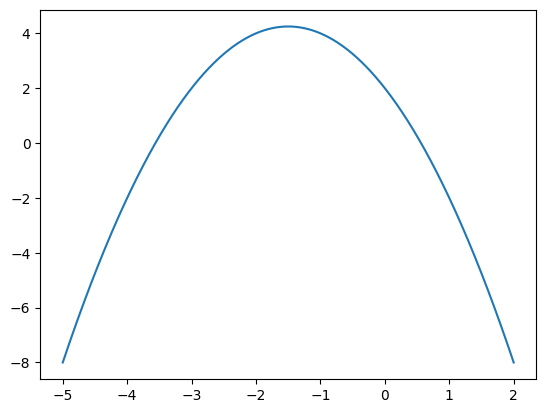

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def F(x):
    return -x**2 - 3*x + 2

x = np.linspace(-5, 2, 1000)
y = F(x)

r1, r2 = np.roots([-1, -3, 2])
print(f'The roots are {r1}, {r2}.')

fig, ax = plt.subplots()
ax.plot(x, y)

In [16]:
show('Exercise 1')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
🚩 **Exercise 2**

The roots $x_\ast$ both satisfy

$$
F(x_\ast) = -x_\ast^2 - 3x_\ast + 2 = 0.
$$

Two of the many possible ways to rearrange this equation to something of the form $x_\ast = G(x_\ast)$ are:

\begin{align}
x_\ast &= G_1(x_\ast) = \frac{2}{x_\ast + 3}, \\
x_\ast &= G_2(x_\ast) = -x_\ast^2 - 2x_\ast + 2.
\end{align}

Define two functions `G1(x)`, `G2(x)` corresponding to the above. Then, with a starting guess of $x_0 = -4$, compute $x_{k+1} = G_i(x_k)$ for $k=1, 2, \dots, 7$, and $i=1, 2$. Display all successive values of the guesses $x_k$ for both methods.

Do you observe convergence for both methods? If so, to which root?

In [24]:
def G1(x):
    return 2 / (x + 3)

def G2(x):
    return -x**2 - 2*x + 2

x_vals_1 = [-4]
x_vals_2 = [-4]

for k in range(8):
    x_vals_1.append(G1(x_vals_1[k]))
    x_vals_2.append(G2(x_vals_2[k]))

print(f'G1 values: {x_vals_1[1:]}\nG2 values: {x_vals_2[1:]}.')

# First method converges to 0.56 root


G1 values: [-2.0, 2.0, 0.4, 0.5882352941176471, 0.5573770491803278, 0.5622119815668203, 0.5614489003880984, 0.5615691972393753]
G2 values: [-6, -22, -438, -190966, -36467631222, -1329888126870853950838, -1768602429992068534155014726612412013000566, -3127954555373849680466256992495445276664759984094409758607250516307784194574690319222].


In [23]:
show('Exercise 2')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
### 1.2. Conditions for convergence

Although there are often many ways to write $F(x) = 0$ as $x = G(x)$, not all of these lead to convergence.

---
### 🚩 Theorem: Conditions for convergence of fixed point iteration

Let $x_\ast$ be a solution of $F(x) = 0$, and an iteration function $G(x)$ be defined such that $x_\ast$ is a fixed point of $G$, i.e. we have $x_\ast = G(x_\ast)$.

If $G(x)$ is differentiable, the fixed-point iteration $x_{k+1} = G(x_k)$ will converge to $x_\ast$ if
- $|G'(x)| < 1$ in some neighbourhood of $x_\ast$,
- and either:
    - the initial guess $x_0$ is chosen in this neighbourhood, or
    - some later iteration value $x_k$ is in this neighbourhood.


---
The proof is given in **ASC section 5.3**, and can be established using the Mean Value Theorem (more about this in the video this week) to write the error $e_{k+1} = x_{k+1} - x_\ast$ in terms of $e_k$, the error at the previous iteration:

$$
|e_{k+1}| = |G'(\eta)| |e_k|, \qquad \text{for some} \: \eta \in (\min(x_k, x_\ast), \max(x_k, x_\ast)).
$$

As long as $|G'(x)| < 1$ in a neighbourhood of $x_\ast$ (which includes $\eta$), then for any $x_k$ in that neighbourhood, we have $|e_{k+1}| < |e_k|$, meaning that the absolute error decreases monotonically for all subsequent iterations, guaranteeing convergence to $x_\ast$.

---
🚩 **Exercise 3**

Plot $|G_1'(x)|$ and $|G_2'(x)|$ over $[-5, 5]$, with the exact roots of $F(x)$ indicated on the same plot. For either method, are there possible initial guesses which guarantee convergence towards either root?

[Text(0.5, 0, '$x$'), Text(0, 0.5, '$F(x)$'), (-5.0, 5.0), (-0.5, 5.0)]

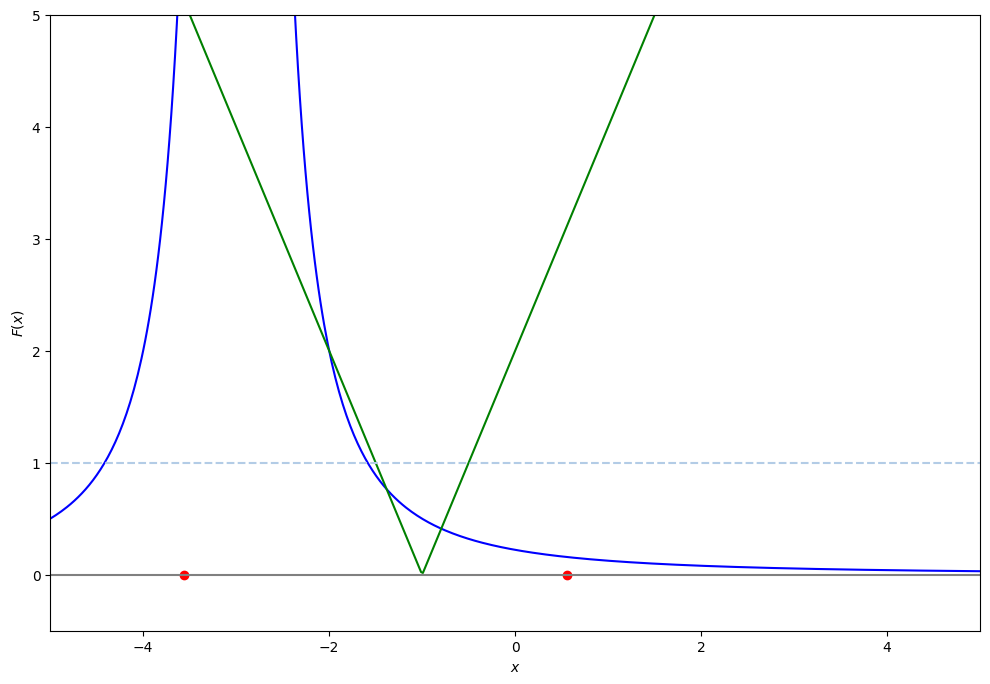

In [37]:
def G1_deriv(x):
    return (-2) / (x + 3)**2

def G2_deriv(x):
    return -2*x - 2

x = np.linspace(-5, 5, 500)
y_vals_1 = G1_deriv(x)
y_vals_2 = G2_deriv(x)

r1, r2 = np.roots([-1, -3, 2])

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot([r1, r2], [F(r1), F(r2)], 'ro')
ax.plot(x, abs(G1_deriv(x)), 'b-', label=r'$G_1\'(x)$')
ax.plot(x, abs(G2_deriv(x)), 'g-', label=r'$G_2\'(x)$')
ax.axhline(0.0, color=[0.5, 0.5, 0.5])
ax.axhline(1.0, color=[0.7, 0.8, 0.9], linestyle='--')
ax.set(xlabel=r'$x$', ylabel=r'$F(x)$', xlim=[-5, 5], ylim=[-0.5, 5])

In [27]:
show('Exercise 3')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

### 1.3. Convergence rate for fixed point iteration

The next few exercises explore the rate of convergence of fixed point iteration.

---
🚩 **Exercise 4**

Consider the function

\begin{equation}
  F \left( x \right) = x - x^2 \sin x.
\end{equation}

Plot this function in the interval $x \in \left[ -2, 2 \right]$ and identify the three roots in this interval. 

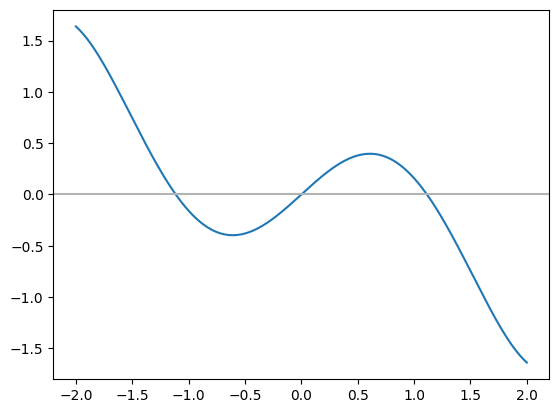

In [43]:
x = np.linspace(-2, 2, 500)

def F(x):
    return (x - x**2 * np.sin(x))

fig, ax = plt.subplots()
ax.plot(x, F(x))
ax.axhline(0.0, color=[0.7, 0.7, 0.7])


In [41]:
show('Exercise 4')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
🚩 **Exercise 5**

At a root $x_*$ of $F \left( x \right)$ we have

$$
  x_* - x_*^2 \sin x_* = 0.
$$

Given an $\alpha \ne 0$ this is equivalent to

$$
  x_* = \left( 1 + \alpha \right) x_* - \alpha x_*^2 \sin x_*.
$$

This suggests the fixed-point iteration

$$
  x_{n + 1} = \left( 1 + \alpha \right) x_n - \alpha x_n^2 \sin x_n \quad \textrm{ for } n = 0, 1, 2, \ldots.
$$


Use a `while` loop to implement fixed-point iteration using the scheme above with an initial guess $x_0 = 1$ and with $\alpha = 1.2$.  You will need to choose an appropriate condition on which to exit the loop.

Hint: you may find it convenient to define a function `G` representing the iteration function.

In [82]:
def G(x):
    return (1 + 1.2)*x - 1.2*np.sin(x)*x**2

x = 1
x_vals = [1]
n = 1

while abs(x - np.sin(x)*x**2) >= 1.0e-12:
    x = G(x)
    x_vals.append(G(x))
    n += 1
print(x)


def G(x, alpha):
    return (1.0 + alpha) * x - alpha * (x ** 2) * np.sin(x)


# Initialisation
x = 1.0
alpha = 1.2

while True:
    x_new = G(x, alpha)
    
    # Convergence achieved
    if abs(x_new - x) < 1.0e-12:
        break
        
    # Update value for next iteration
    x = x_new

x_star = x_new
print(f"Root = {x_star}")

1.1141571408713007
Root = 1.114157140872326


In [47]:
show('Exercise 5')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
🚩 **Exercise 6**

Use the function `fsolve()` from `scipy.optimize` to find the root of $F \left( x \right)$ near $x = 1$. Create a plot of error magnitude against iteration number, where the error is the difference between the solution obtained via `fsolve()` (taken as the "ground truth"), and the values for $x_k$ obtained via the fixed-point iteration used in Exercise 5. Use a logarithmic scale for the y-axis.

[Text(0.5, 0, 'Iteration'), Text(0, 0.5, 'Error magnitude')]

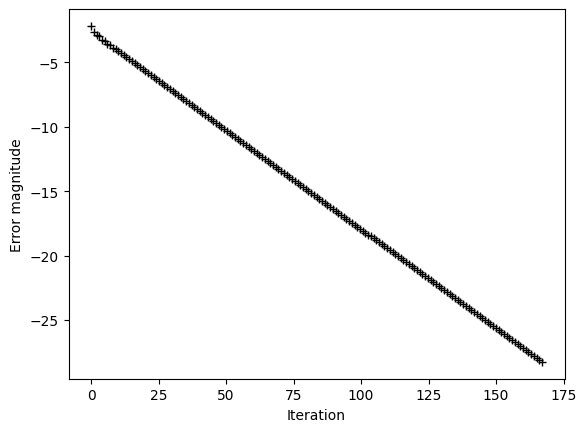

In [83]:
import scipy.optimize as sc

true = sc.fsolve(F, 1)
error = np.abs(true - x_vals)
x_star_fsolve = sc.fsolve(F, 1)
x_axis = np.linspace(0, n, n)

fig, ax = plt.subplots()
ax.plot(x_axis, np.log(error), "k+")
ax.set(xlabel="Iteration", ylabel="Error magnitude")

In [63]:
show('Exercise 6')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
🚩 **Exercise 7**

Find the root near $x = 1$ using bisection, with an initial interval defined by $a = 0.5$ and $b = 1.5$. In the same figure as the plot for Exercise 6, plot the magnitude of the difference between the root obtained via `fsolve()`, and the values of $\left( a + b \right) / 2$ obtained in each bisection iteration, plotting this error magnitude against iteration number. Which of bisection and fixed point iteration converges faster to the root?

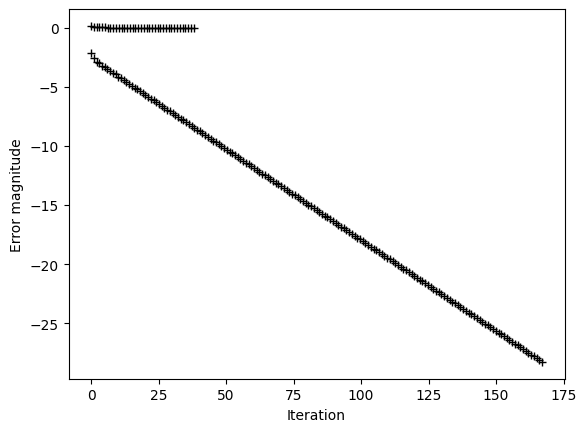

In [84]:
a = 0.5
b = 1.5
iter = 0
guess = []
c = (a + b)/2

while abs(F(c)) > 1.0e-12:
    iter += 1
    if F(c)*F(a) <= 0:
        b = c
    else:
        a = c
    c = (a + b)/2
    
    guess.append(c)

import scipy.optimize as sc

true = sc.fsolve(F, 1)
error = np.abs(true - x_vals)
error2 = np.abs(true - guess)
x_axis = np.linspace(0, n, n)
x_axis_2 = np.linspace(0, iter, iter)

fig, ax = plt.subplots()
ax.plot(x_axis, np.log(error), "k+")
ax.set(xlabel="Iteration", ylabel="Error magnitude")
ax.plot(x_axis_2, error2, "k+")






plt.show()


In [68]:
show('Exercise 7')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
🚩 **Exercise 8**

Repeat Exercise 6 with $\alpha = 0.8$. Plot the error magnitude on the same graph as that from Exercises 6 and 7. What do you observe?

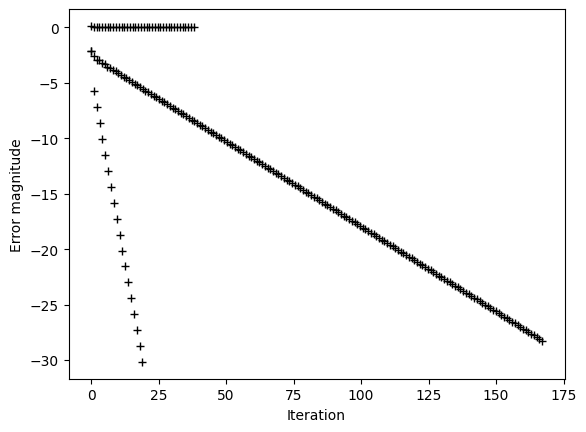

In [85]:
a = 0.5
b = 1.5
iter = 0
guess = []
c = (a + b)/2

while abs(F(c)) > 1.0e-12:
    iter += 1
    if F(c)*F(a) <= 0:
        b = c
    else:
        a = c
    c = (a + b)/2
    
    guess.append(c)

import scipy.optimize as sc

true = sc.fsolve(F, 1)
error = np.abs(true - x_vals)
error2 = np.abs(true - guess)
x_axis = np.linspace(0, n, n)
x_axis_2 = np.linspace(0, iter, iter)

fig, ax = plt.subplots()
ax.plot(x_axis, np.log(error), "k+")
ax.set(xlabel="Iteration", ylabel="Error magnitude")
ax.plot(x_axis_2, error2, "k+")

def G(x):
    return (1 + 0.8)*x - 0.8*np.sin(x)*x**2

x = 1
x_vals = [1]
n = 1

while abs(x - np.sin(x)*x**2) >= 1.0e-12:
    x = G(x)
    x_vals.append(G(x))
    n += 1

true = sc.fsolve(F, 1)
error = np.abs(true - x_vals)
error2 = np.abs(true - guess)
x_axis = np.linspace(0, n, n)
x_axis_2 = np.linspace(0, iter, iter)
ax.plot(x_axis, np.log(error), "k+")
plt.show()

In [86]:
show('Exercise 8')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
## 2. Newton's method

Newton's method proceeds by repeatedly finding the root $x_{k+1}$ of a linear approximation to the function $F$ around the current guess $x_k$. The algorithm proceeds with the following steps until convergence:
1. Start from a guess $x_k$.
2. Draw the tangent to $F(x)$ at $x = x_k$.
3. Find the point of intersection of this tangent with the x-axis. This is the next guess $x_{k+1}$.
4. Advance to the next iteration, i.e. set $x_k = x_{k+1}$ and go back to step 1.

| Initial guess ($x_0 = 0.5$) | Drawing the tangent |
|:-:|:-:|
| ![Initial guess](graphics/newton_example_2.png) | ![Drawing the tangent](graphics/newton_example_3.png) | 
| **New guess $x_1$ - first iteration complete** | **Second iteration: draw the tangent at $x = x_1$ to find $x_2$** |
| ![First iteration](graphics/newton_iteration_1.png) | ![Second iteration](graphics/newton_iteration_2.png) |

### 2.1. Derivation

Consider the Taylor expansion of $F(x)$ around $x_k$:

$$
F(x) = F(x_k) + (x - x_k) F'(x_k) + \dots
$$

The goal is to find a root of $F$ at a future iteration. Ignoring the higher order terms in the Taylor expansion lets us approximate $F$ with a linear function -- the tangent of $F$ at $x = x_k$:

$$
F(x) \approx F(x_k) + (x - x_k) F'(x_k).
$$

Newton's method then proceeds by finding the root of this linear approximation, i.e. the point of intersection between the tangent at $x = x_k$ and the x-axis, by setting

$$
F(x) \approx F(x_k) + (x - x_k) F'(x_k) = 0.
$$

Solving the above for $x$ gives us the next guess $x_{k+1}$:

$$
x_{k+1} = x_k - \frac{F(x_k)}{F'(x_k)}.
$$

---

Note that **Newton's method** is a particular type of **fixed-point iteration**. Starting from an initial guess $x_0$, we have

$$
x_{k+1} = G(x_k) \quad \textrm{ for } k = 0, 1, 2, \ldots
$$

where the iteration function $G(x)$ takes the form

$$
G(x) = x - \frac{F(x)}{F'(x)}.
$$

---
🚩 **Exercise 9**

Consider the function

$$
  F \left( x \right) = e^{0.1 x} \sin \left( 4 \pi x \right) + x^2 + 0.5.
$$

Define a function `F` to represent $F \left( x \right)$. Use this function `F` to plot $F(x)$ in the interval $x \in \left[ 0, 1 \right]$, and identify the approximate values of the two roots in this interval.

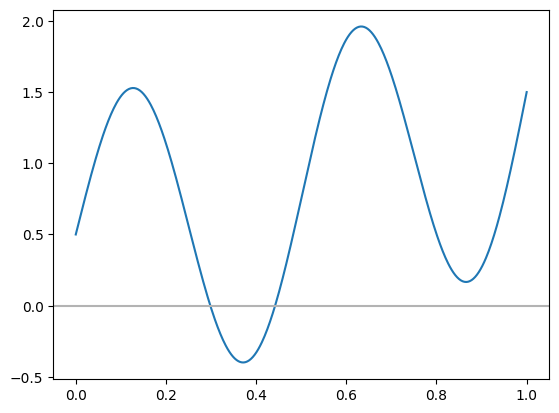

In [95]:
def F(x):
    return np.exp(0.1*x)*np.sin(4*x*np.pi) + x**2 + 0.5

x = np.linspace(0, 1, 500)
y = F(x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.axhline(0.0, color=[0.7, 0.7, 0.7])

In [90]:
show('Exercise 9')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
🚩 **Exercise 10**

Define a second function `Fp` which can be used to evaluate the derivative $F' \left( x \right)$.

Then, define a function `G` which can be used to evaluate the iteration function associated with using Newton's method to find a root of $F \left( x \right)$.

Plot $G \left( x \right) - x$. By visual comparison with the plot from Exercise 9, verify graphically that, for $x \in \left[ 0, 1 \right]$, $G \left( x \right) = x$ at the same values of $x$ at which $F \left( x \right) = 0$ (i.e. that the fixed points of $G(x)$ are the same as the roots of $F(x)$).

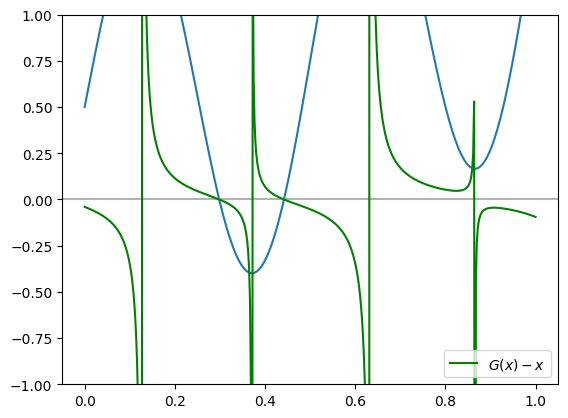

In [97]:
def F(x):
    return np.exp(0.1*x)*np.sin(4*x*np.pi) + x**2 + 0.5

x = np.linspace(0, 1, 500)
y = F(x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.axhline(0.0, color=[0.7, 0.7, 0.7])


def Fp(x):
    # Note that the backslash "\" here allows code to be split over several lines
    return 0.1 * np.exp(0.1 * x) * np.sin(4.0 * np.pi * x) + \
        4.0 * np.pi * np.exp(0.1 * x) * np.cos(4.0 * np.pi * x) + 2.0 * x

def G(x):
    return x - F(x)/Fp(x)

# Draw G(x) - x on the same plot as above
ax.plot(x, G(x) - x, "g-", label=r'$G(x) - x$')
ax.set(ylim=[-1, 1])
ax.legend()
plt.show()

In [92]:
show('Exercise 10')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
🚩 **Exercise 11**

For each of the two roots, choose an appropriate initial guess, and use Newton's method to compute them.

In [99]:
# The roots are close to 0.3 and 0.45, respectively
for x0 in [0.3, 0.45]:
    
    # Initial guess
    x = x0
    
    # Loop until convergence
    while True:
        x_new = G(x)
        
        # Convergence achieved
        if abs(x_new - x) < 1.0e-14:
            break
        
        # Update for next iteration
        x = x_new
    
    # Display the value of the root
    print(f"Root = {x_new:.16e}")

Root = 2.9843308716369504e-01
Root = 4.4207025937143268e-01


In [100]:
show('Exercise 11')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
### 2.2. Convergence of Newton's method

Newton's method is a particular type of fixed point iteration. As we've seen in Section 1.2 earlier, the absolute error at iterations $k$ and $k+1$ are related by

$$
|e_{k+1}| = |G'(\eta)| |e_k|, \qquad \text{for some} \: \eta \in (\min(x_k, x_\ast), \max(x_k, x_\ast)).
$$

Consider the case where $F$ is twice differentiable (at least in a neighbourhood of $x_\ast$). What is the value of $G'(x)$ at the root $x = x_\ast$?

$$
G'(x_\ast) = 1 - \frac{F'(x_\ast)}{F'(x_\ast)} + \frac{F(x_\ast) F''(x_\ast)}{\left(F'(x_\ast)\right)^2}
= 0, \qquad \text{since by definition,} \: F(x_\ast) = 0.
$$

Therefore, if $G(x)$ is *continuously differentiable* in some neighbourhood of $x_\ast$, we have

$$
\lim_{x \to x_\ast} G'(x) = 0.
$$

This means that for $\eta$ in this neighbourhood, $|G'(\eta)|$ decreases more and more as we approach the root, and convergence **accelerates**!

---
#### Conditions for convergence of Newton's method

To guarantee convergence for fixed-point iteration, we saw earlier that it is sufficient to choose an initial guess $x_0$ in a neighbourhood of $x_\ast$ where $G(x)$ is differentiable and $|G'(x)|<1$.

For Newton's method, we have $G'(x_\ast) = 0$. Therefore, if $G'(x)$ is continuously differentiable in some neighbourhood of $x_\ast$, then by the Intermediate Value Theorem applied to $G'(x)$, there must be a neighbourhood (possibly smaller) near the root for which $|G'(x)| < 1$.

Therefore, for Newton's method to converge, it is sufficient that
- $G(x)$ is continuously differentiable,
- and either
    - $x_0$ is chosen to be sufficiently close to $x_\ast$, or
    - some later iteration value $x_k$ is sufficiently close to $x_\ast$.

This ensures that all subsequent iterations after $x_0$ (or after $x_k$) will reduce the absolute error.

---
#### Order of convergence of Newton's method

In Week 8 we saw that the order of convergence $p$ of a root-finding method verified

$$
\lim_{k\to \infty} \frac{|e_{k+1}|}{|e_k|^p} = \alpha,
$$

where $\alpha$ is a constant.

---
🚩 **Exercise 12**

Consider a function

$$
  F \left( x \right) = e^x - a,
$$

where $a$ is a given positive real number. The root of this equation is $x_\ast = \log a$.

Implement Newton's method to compute $\log 5$ as the root of $F(x)$ for $a = 5$, starting from an initial guess of $x_0 = 1$. How many iterations does Newton's method take until $\left| x_{k + 1} - x_k \right| < 10^{-14}$?

In [103]:
# Initialise a, the initial guess x0, and the number of iterations
a = 5.0
x = 1.0
its = 0
error = []

# Loop until convergence
while True:
    its += 1
    x_new = x - (np.exp(x) - a) / np.exp(x)
    error.append(abs(x_new - x))
    # Convergence achieved
    if abs(x_new - x) < 1.0e-14:
        break
    
    # Update for next iteration
    x = x_new

print(f"log 2 is approximately {x_new:.16e}")
print(f"Number of iterations = {its}")

log 2 is approximately 1.6094379124341003e+00
Number of iterations = 6


In [101]:
show('Exercise 12')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
🚩 **Exercise 13**

Modify your code from Exercise 12 to store the successive values of the absolute error $|e_k| = |x_k - x_\ast|$. Use these values to determine numerically the order of convergence of Newton's method.

log 2 is approximately 1.6094379124341003e+00
Number of iterations = 6
[6.09437912e-01 2.29959293e-01 2.45252393e-02 2.98300079e-04
 4.44870452e-08 1.11022302e-15]


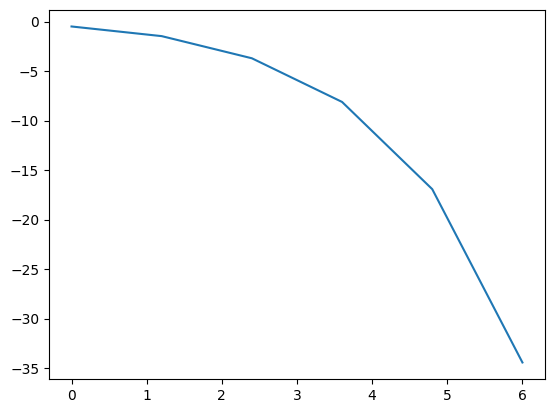

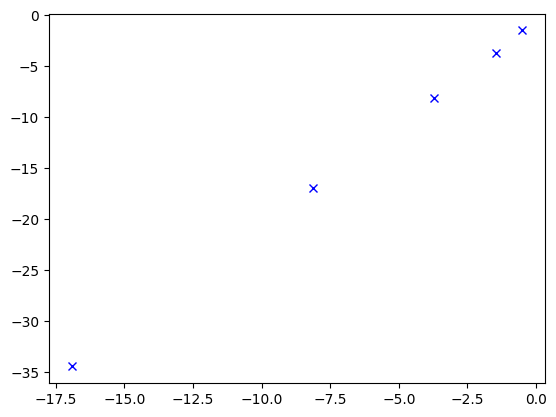

The order of convergence is p = 1.99775


In [114]:
# Initialise a, the initial guess x0, and the number of iterations
a = 5.0
x = 1.0
its = 0
error = [abs(x - np.log(a))]

# Loop until convergence
while True:
    its += 1
    x_new = x - (np.exp(x) - a) / np.exp(x)
    error.append(abs(x_new - np.log(a)))
    # Convergence achieved
    if abs(x_new - x) < 1.0e-14:
        break
    
    # Update for next iteration
    x = x_new

print(f"log 2 is approximately {x_new:.16e}")
print(f"Number of iterations = {its}")

x = np.linspace(0, its, its)

fig, ax = plt.subplots()
ax.plot(x, np.log(error))

# Start a list to store the error
err = [abs(x - np.log(a))]

# Loop until convergence
while True:
    its += 1
    x_new = x - (np.exp(x) - a) / np.exp(x)
    
    err.append(abs(x_new - np.log(a)))
    
    # Convergence achieved
    if abs(x_new - x) < 1.0e-14:
        break
    
    # Update for next iteration
    x = x_new

# Convert to Numpy array and remove last value (it's computed as zero)
err = np.array(err[:-1])
print(err)

# One way to find the order of convergence
fig, ax = plt.subplots()
ax.plot(np.log(err[:-1]), np.log(err[1:]), 'bx')
plt.show()

slope, _ = np.polyfit(np.log(err[:-1]), np.log(err[1:]), 1)
print(f'The order of convergence is p = {slope:.5f}')

In [115]:
show('Exercise 13')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…

---
🚩 **Exercise 14**

Compute and display the successive values of the absolute error using different values of the initial guess $x_0$. How many iterations are needed to converge to the root for different $x_0$? What happens when $x_0$ is set further away from $x_\ast$?

In [116]:
show('Exercise 14')

Accordion(children=(Output(layout=Layout(border_bottom='1px solid green', border_left='1px solid green', borde…